In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('train.csv')
df.head(2)

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99.0,99.0,99.0,99.0,99.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,99.0,9.0,98.0,98.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,99.0,9.0,1.0,4.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,3884.805998,40026.0,1.0,0.0
1,13005143,4,1,3,1,2,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99.0,99.0,99.0,99.0,99.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,99.0,9.0,98.0,98.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,99.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,1627.108106,40015.0,2.0,1.0


In [4]:
df.describe()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
count,3.999900e+04,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.00000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.00000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.00000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000,39998.000000
mean,5.444733e+07,3.355684,0.476762,3.424611,1.001900,2.082127,1.007650,1.162704,1.011100,97.408260,70.870922,2.380410,2.660267,2.232306,2.048626,39.541864,86.093527,12.832496,92.305133,89.334858,91.336558,97.101180,97.135682,97.146807,97.129306,97.134432,1.772039,1.019301,1.916371,1.00995,1.962198,1.005750,1.387444,1.014151,85.787414,7.882944,97.975699,97.975699,1.966848,1.10383,1.018401,1.855068,1.741362,1.143832,1.837167,1.018401,1.930897,1.018301,1.799490,1.00990,1.972874,1.014651,1.963573,1.010851,94.082904,8.521826,2.582604,4.746037,1.060503,1.191810,1.761938,2.336567,2.213286,2.229111,1.643632,1.761588,1.979324,1.979099,4690.211117,40024.444422,1.494400,0.069778
std,2.555308e+07,1.176259,0.888844,1.427695,0.063219,1.101200,0.124267,0.469136,0.146212,12.302351,44.326702,6.555333,8.990996,5.014384,7.842170,47.784954,32.987373,30.627632,24.203718,28.836234,25.772256,13.294884,13.049666,12.969584,13.095331,13.058633,0.419702,0.196037,0.277105,0.14143,0.191112,0.108018,0.487327,0.168232,33.319924,2.752929,1.536762,1.536762,8.965039,0.30529,0.191479,0.352250,4.060015,3.403242,0.369421,0.191479,0.253929,0.190966,0.400574,0.14108,0.162915,0.171136,0.187752,0.147594,20.559798,1.864919,1.983648,2.107959,0.342853,0.589098,0.426079,0.850607,5.238955,5.236775,0.617606,0.770719,0.142825,0.143578,5728.896554,200.668318,0.500125,0.254777
min,1.000222e+07,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,3.218566e+07,4.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,99.000000,2.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,2.000000,1.000000,2.000000,1.00000,2.000000,1.000000,1.000000,1.000000,99.000000,9.000000,98.000000,98.000

In [5]:
print(df.isna().sum())
#print(df.info())

PERID       0
IFATHER     0
NRCH17_2    0
IRHHSIZ2    0
IIHHSIZ2    0
           ..
AIIND102    1
ANALWT_C    1
VESTR       1
VEREP       1
Criminal    1
Length: 72, dtype: int64


In [6]:
df.columns

Index(['PERID', 'IFATHER', 'NRCH17_2', 'IRHHSIZ2', 'IIHHSIZ2', 'IRKI17_2',
       'IIKI17_2', 'IRHH65_2', 'IIHH65_2', 'PRXRETRY', 'PRXYDATA', 'MEDICARE',
       'CAIDCHIP', 'CHAMPUS', 'PRVHLTIN', 'GRPHLTIN', 'HLTINNOS', 'HLCNOTYR',
       'HLCNOTMO', 'HLCLAST', 'HLLOSRSN', 'HLNVCOST', 'HLNVOFFR', 'HLNVREF',
       'HLNVNEED', 'HLNVSOR', 'IRMCDCHP', 'IIMCDCHP', 'IRMEDICR', 'IIMEDICR',
       'IRCHMPUS', 'IICHMPUS', 'IRPRVHLT', 'IIPRVHLT', 'IROTHHLT', 'IIOTHHLT',
       'HLCALLFG', 'HLCALL99', 'ANYHLTI2', 'IRINSUR4', 'IIINSUR4', 'OTHINS',
       'CELLNOTCL', 'CELLWRKNG', 'IRFAMSOC', 'IIFAMSOC', 'IRFAMSSI',
       'IIFAMSSI', 'IRFSTAMP', 'IIFSTAMP', 'IRFAMPMT', 'IIFAMPMT', 'IRFAMSVC',
       'IIFAMSVC', 'IRWELMOS', 'IIWELMOS', 'IRPINC3', 'IRFAMIN3', 'IIPINC3',
       'IIFAMIN3', 'GOVTPROG', 'POVERTY3', 'TOOLONG', 'TROUBUND', 'PDEN10',
       'COUTYP2', 'MAIIN102', 'AIIND102', 'ANALWT_C', 'VESTR', 'VEREP',
       'Criminal'],
      dtype='object')

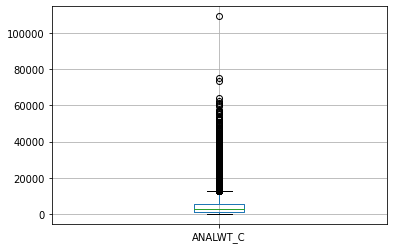

In [7]:
#for numerical data
f.boxplot(column=['ANALWT_C'])

In [0]:
def plot_dis(var):
  fig , ax = plt.subplots(nrows =1)
  sns.countplot(x =var , hue ='Criminal',data =df,ax = ax)
  plt.show()

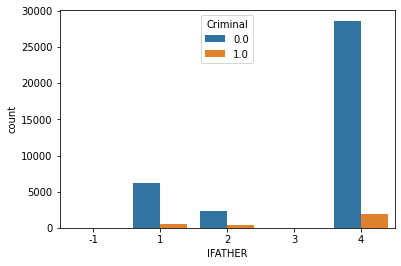

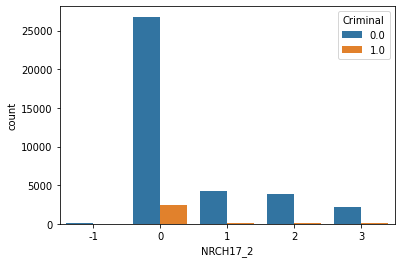

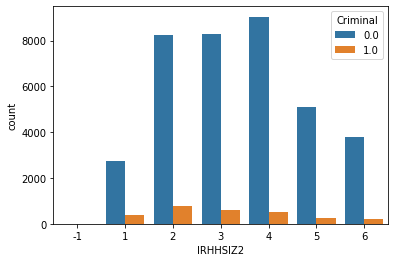

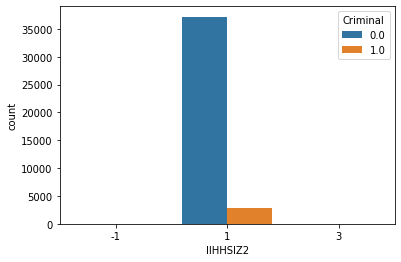

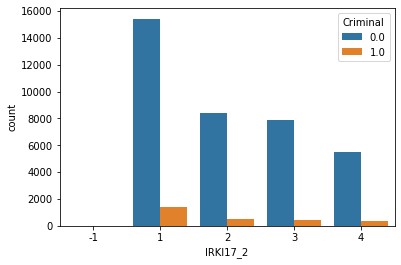

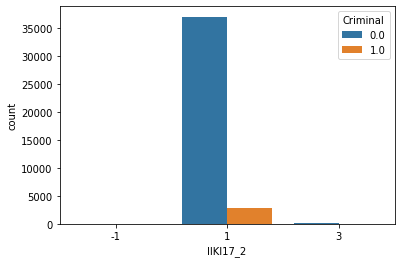

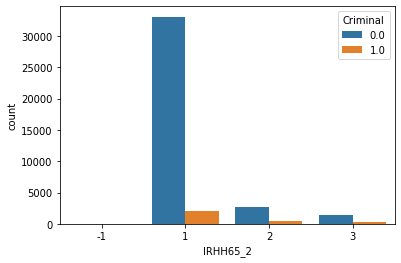

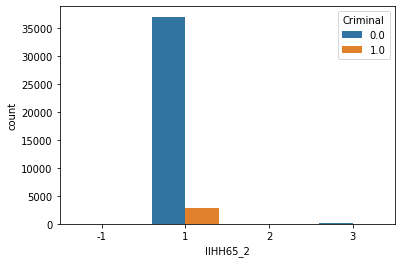

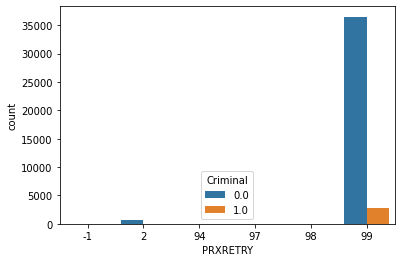

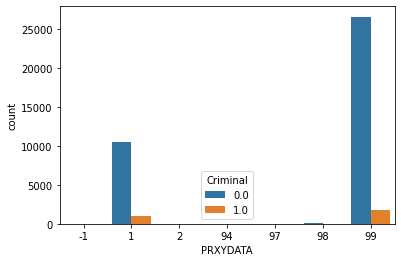

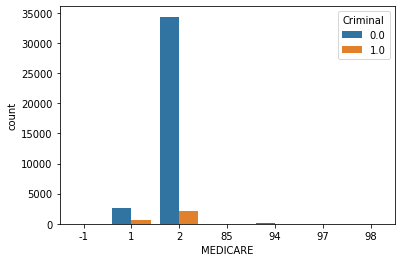

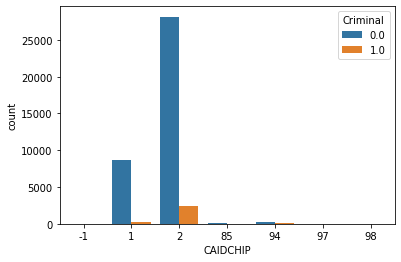

In [9]:
for i in df.columns[1 :13]:
  plot_dis(i)

In [0]:
#droping na values
df.dropna(inplace=True)

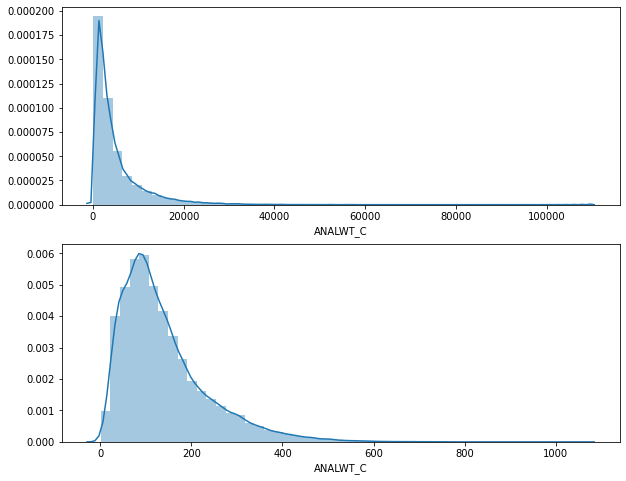

In [12]:
fig , ax = plt.subplots(nrows =2 ,figsize =(10,8))
sns.distplot(df['ANALWT_C'],ax =ax[0])
sns.distplot((df['ANALWT_C'])**0.6,ax=ax[1])
plt.show()

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , plot_roc_curve

In [0]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
#X_re ,y_re= smote.fit_resample(df.iloc[:,:-1],df.iloc[:,-1])

In [0]:
#x_train,x_test ,y_train,y_test = train_test_split(X_re,y_re,test_size=0.2 ,random_state = 42)
x_train,x_test ,y_train,y_test = train_test_split(df.iloc[:,1:-1],df.iloc[:,-1], stratify=df.iloc[:,-1],test_size=0.2 ,random_state = 42)

In [51]:
X_re ,y_re= smote.fit_resample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [54]:
clf = ExtraTreesClassifier()
clf.fit(X_re,y_re)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [55]:
clf.score(x_test,y_test)

0.94425

In [56]:
confusion_matrix(y_test, clf.predict(x_test))

array([[7232,  210],
       [ 236,  322]])

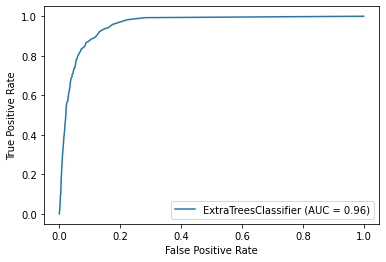

In [46]:
plot_roc_curve( clf,x_test,y_test)